In [2]:
%matplotlib inline

In [3]:
import os
import sys

In [4]:
print sys.version

2.7.14 (default, Jan 17 2018, 15:13:18) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
import pymatgen as mg

/usr/local/lib/python2.7/site-packages/pymatgen/__init__.py:87: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")


In [7]:
DATA_DIR = './data'

#### Load data

In [8]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'),
                    names=['id', 'spacegroup', 'natoms', 'al',
                           'ga', 'in', 'a', 'b', 'c',
                           'alpha', 'beta',
                           'gamma', 'E0',
                           'bandgap'],
                    header=0,
                    sep=',')
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'),
                    names=['id', 'spacegroup', 'natoms', 'al',
                           'ga', 'in', 'a', 'b', 'c',
                           'alpha', 'beta',
                           'gamma'],
                    header=0,
                    sep=',')

In [9]:
train_ext = pd.read_csv(os.path.join(DATA_DIR, 'train_ext.csv'),
                    header=0,
                    sep=',')
test_ext = pd.read_csv(os.path.join(DATA_DIR, 'test_ext.csv'),
                    header=0,
                    sep=',')

In [10]:
train = train.merge(train_ext, on='id')
test = test.merge(test_ext, on='id')

Column heading definitions:
- `natoms` is the number of atoms
- `al`, `ga` and `in` are the fractions of the respective elements
- Lattice vectors are now `a`, `b` and `c` in Angstroms
- Angles are `alpha`, `beta` and `gamma` in degrees
- `E0` is the formation energy in eV per atom
- `bandgap` is the bandgap in eV
- `avg_elec` is average electronegativity of metal atoms
- `avg_mass` is average mass of all atoms in unit cell
- `o_cnt` is number of oxygen atoms
- `avg_ea` and `avg_ip` are average electron affinity and ionization potentials of metal atoms
- `avg_rs_max`, `avg_rp_max` and `avg_rd_max` are average sizes of *s*, *p* and *d*-orbitals of metal atoms

In [14]:
train.head()

,id,spacegroup,natoms,al,ga,in,a,b,c,alpha,...,E0,bandgap,avg_elec,avg_mass,o_cnt,avg_ea,avg_ip,avg_rs_max,avg_rp_max,avg_rd_max
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,...,0.0680,3.4387,2.7380,26.803475,48,-0.200725,-5.794325,1.07750,1.436250,2.753750
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,...,0.2490,2.9210,2.7380,26.803475,48,-0.200725,-5.794325,1.07750,1.436250,2.753750
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,...,0.1821,2.7438,2.7230,23.597865,24,-0.228512,-5.787162,1.10375,1.468125,2.931875
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,...,0.2172,3.3492,2.7250,29.175902,18,-0.270350,-5.719350,1.12000,1.472500,2.817500
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,...,0.0505,1.3793,2.7835,44.253090,48,-0.184750,-5.712900,1.02750,1.352500,2.077500


In [12]:
test.head()

,id,spacegroup,natoms,al,ga,in,a,b,c,alpha,beta,gamma,avg_elec,avg_mass,o_cnt,avg_ea,avg_ip,avg_rs_max,avg_rp_max,avg_rd_max
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006,2.768875,40.483793,48,-0.206150,-5.714512,1.050625,1.382500,2.262500
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015,2.728000,24.666402,48,-0.219250,-5.789550,1.095000,1.457500,2.872500
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014,2.732667,29.097450,18,-0.240967,-5.745933,1.100000,1.453333,2.756667
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002,2.743000,27.872011,48,-0.191463,-5.796712,1.068750,1.425625,2.694375
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001,2.769250,39.920105,48,-0.199763,-5.723288,1.047500,1.380625,2.269375


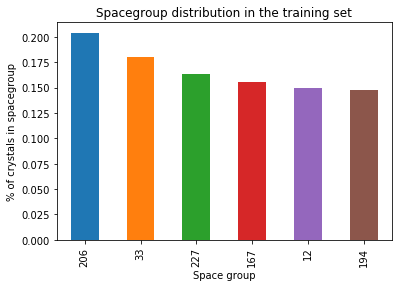

In [13]:
train['spacegroup'].value_counts(normalize=True).plot.bar()
plt.title('Spacegroup distribution in the training set')
plt.ylabel('% of crystals in spacegroup')
plt.xlabel('Space group');

#### Plots of cell parameters by spacegroup

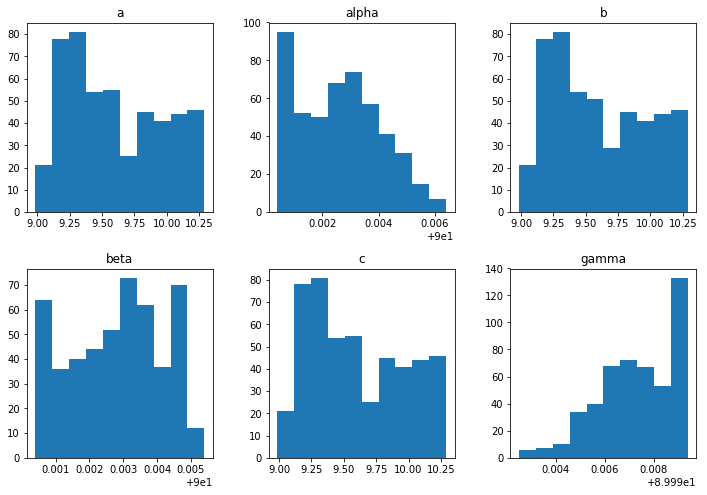

In [14]:
train[train['spacegroup'] == 206].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

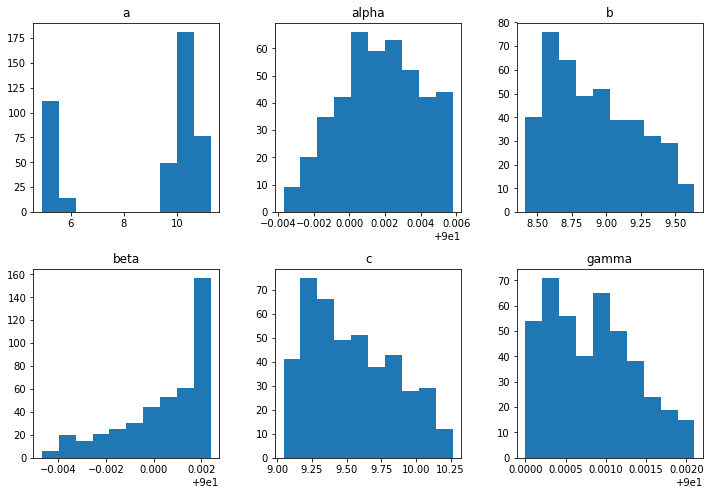

In [15]:
train[train['spacegroup'] == 33].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

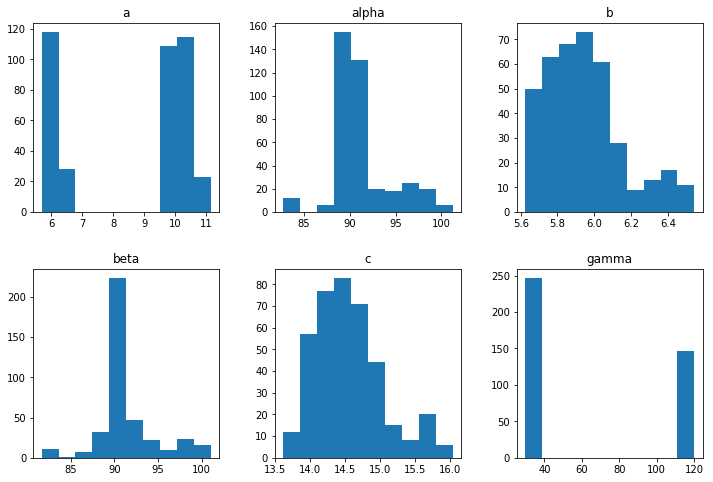

In [16]:
train[train['spacegroup'] == 227].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

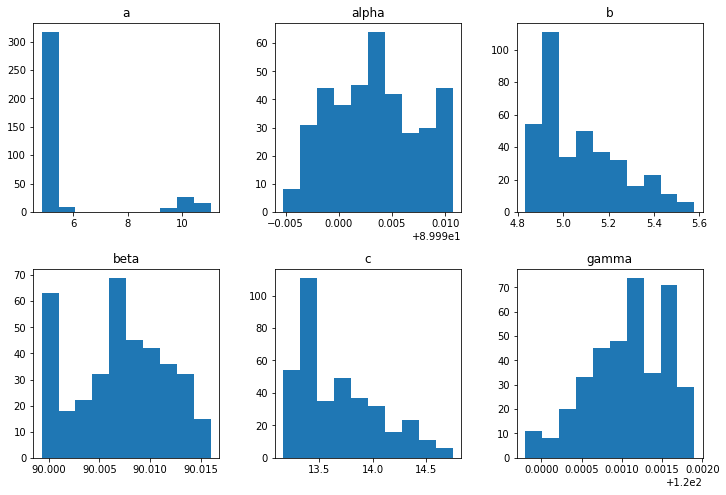

In [17]:
train[train['spacegroup'] == 167].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

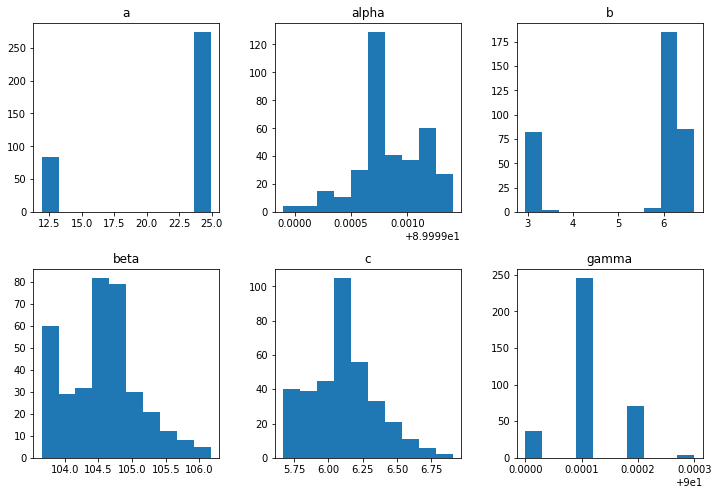

In [18]:
train[train['spacegroup'] == 12].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

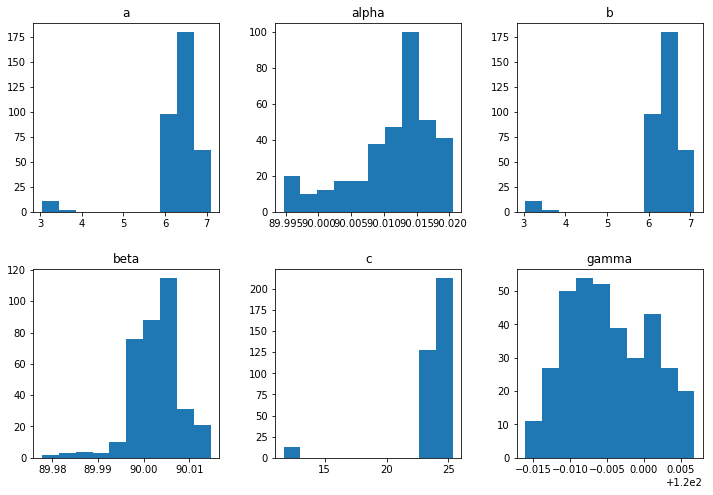

In [19]:
train[train['spacegroup'] == 194].hist(figsize = (12, 8), grid=False,
                                      column = ['a', 'b', 'c', 'alpha', 'beta', 'gamma'],
                                      layout = (2, 3));

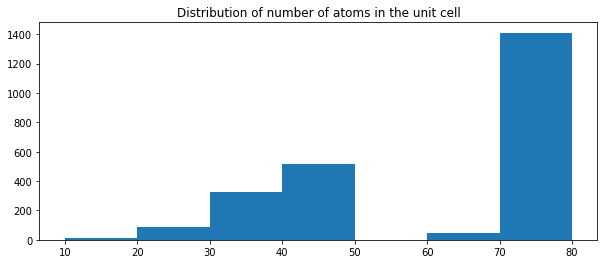

In [22]:
train['natoms'].hist(figsize = (10, 4), grid=False, bins=7)
plt.title('Distribution of number of atoms in the unit cell');

#### Plots of bandgap and formation energy distributions

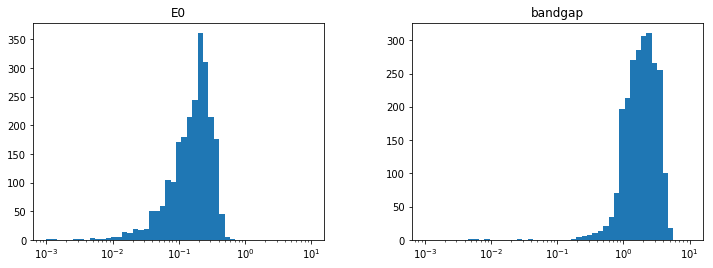

In [23]:
train[['E0', 'bandgap']].hist(figsize = (12, 4),
                              bins = 10 ** np.linspace(np.log10(0.001), np.log10(10), 50),
                              grid=False)
[a.set_xscale("log") for a in plt.gcf().get_axes()];

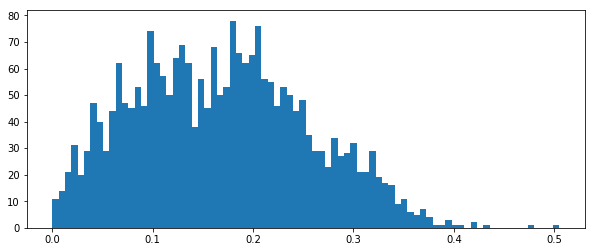

In [24]:
np.log1p(train['E0']).hist(figsize = (10, 4), bins = 80, grid=False);

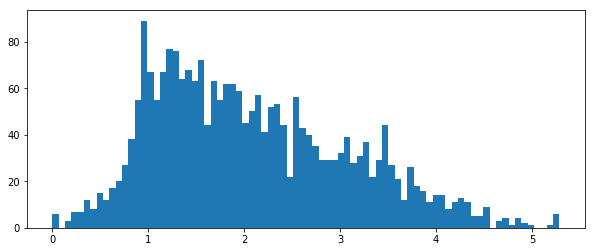

In [25]:
train['bandgap'].hist(figsize = (10, 4), bins = 80, grid=False);

#### Other parameter distribtions

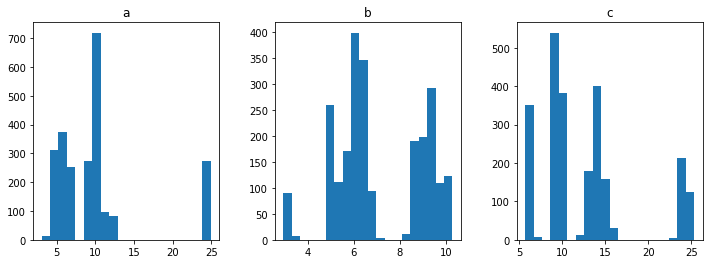

In [21]:
train[['a', 'b', 'c']].hist(figsize = (12, 4),
                            bins=20, grid=False,
                            layout=(1,3));

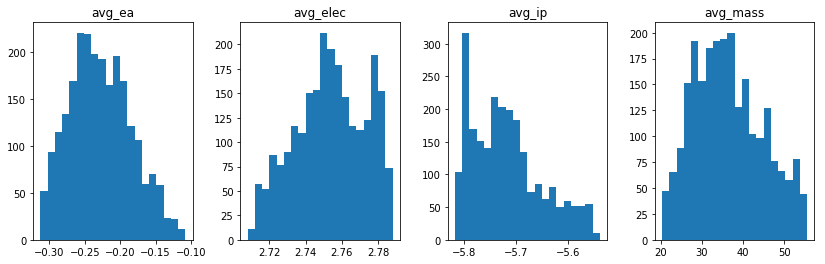

In [29]:
train[['avg_elec', 'avg_mass', 'avg_ea', 'avg_ip']].hist(figsize = (14, 4),
                                                         bins=20, grid=False,
                                                         layout=(1,4));

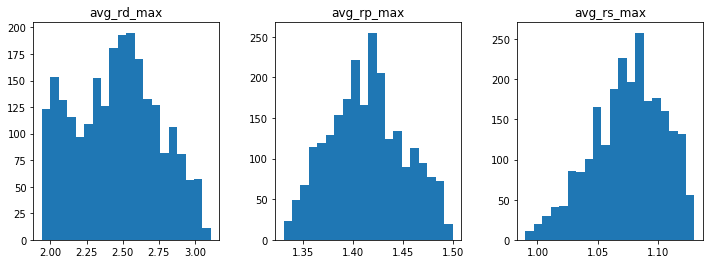

In [30]:
train[['avg_rs_max', 'avg_rp_max', 'avg_rd_max']].hist(figsize = (12, 4),
                                                       bins=20, grid=False,
                                                       layout=(1,3));

#### Pair plots

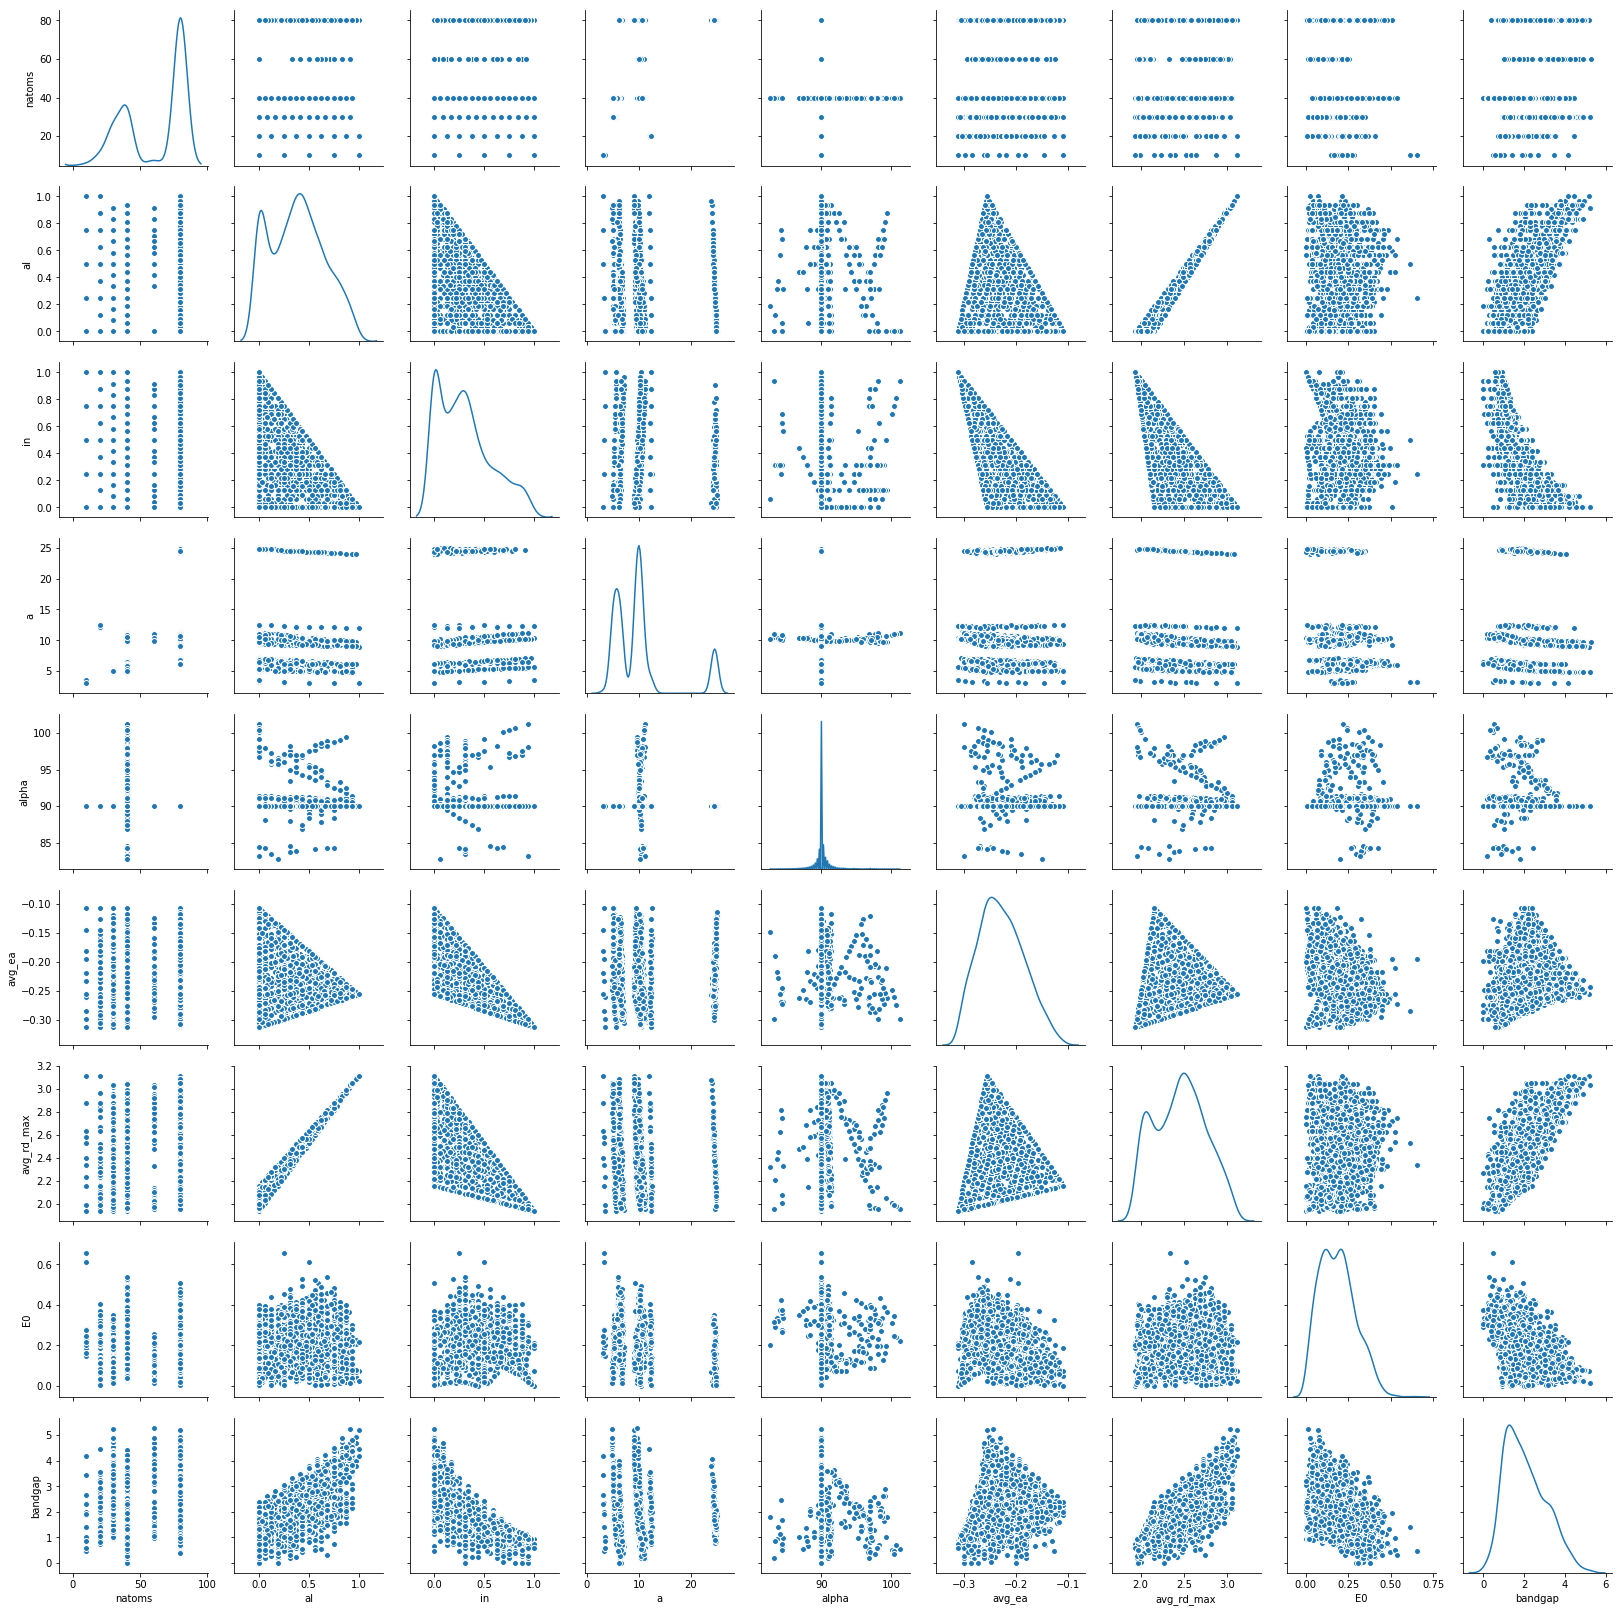

In [31]:
sns.pairplot(train[['natoms', 'al', 'in', 'a', 'alpha', 'avg_ea', 'avg_rd_max', 'E0', 'bandgap']],
             diag_kind='kde');

#### Correlation maps

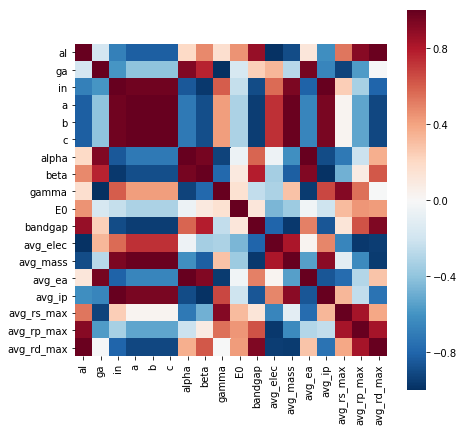

In [33]:
corr = train[train['spacegroup'] == 206].drop(['id', 'natoms', 'o_cnt', 'spacegroup'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

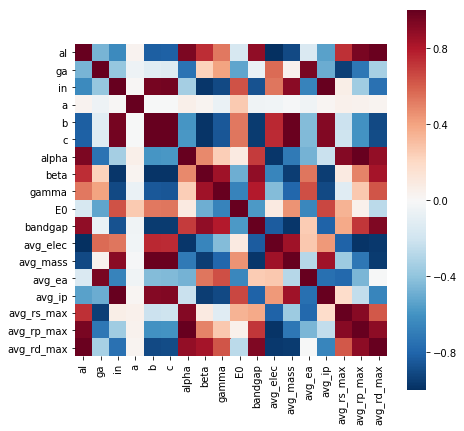

In [34]:
corr = train[train['spacegroup'] == 33].drop(['id', 'natoms', 'o_cnt', 'spacegroup'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

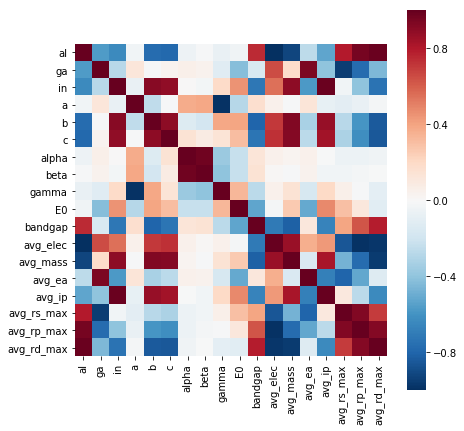

In [35]:
corr = train[train['spacegroup'] == 227].drop(['id', 'natoms', 'o_cnt', 'spacegroup'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

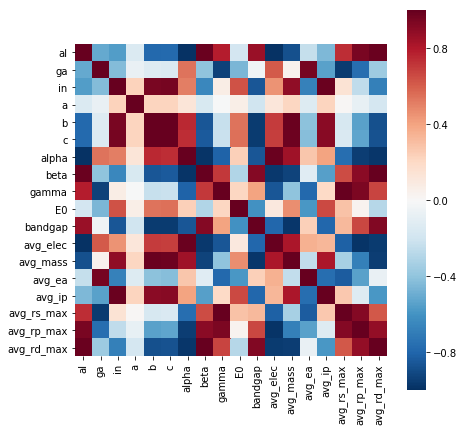

In [36]:
corr = train[train['spacegroup'] == 167].drop(['id', 'natoms', 'o_cnt', 'spacegroup'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

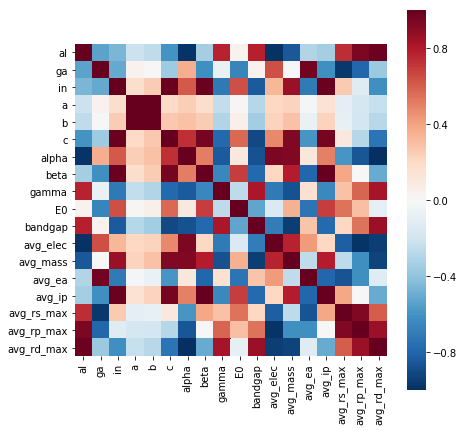

In [37]:
corr = train[train['spacegroup'] == 12].drop(['id', 'natoms', 'o_cnt', 'spacegroup'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

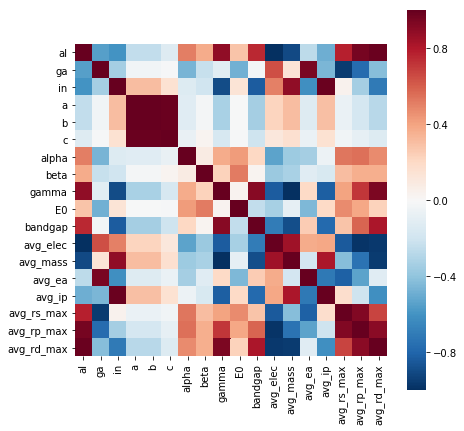

In [38]:
corr = train[train['spacegroup'] == 194].drop(['id', 'natoms', 'o_cnt', 'spacegroup'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

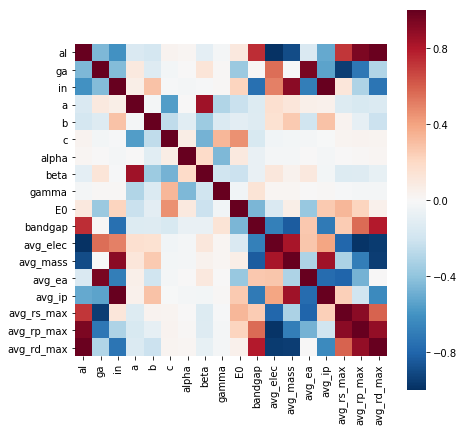

In [39]:
corr = train.drop(['id', 'natoms', 'o_cnt', 'spacegroup'], axis=1).corr()
plt.subplots(figsize=(7, 7))
sns.heatmap(corr,
            square=True,
            center=0, vmax=1, vmin=-1,
            cmap="RdBu_r");

#### New feature (spacegroup and natoms)

In [40]:
train['spacegroup_natoms'] = train['spacegroup'].astype(str) +\
    '_' + train['natoms'].astype(int).astype(str)
test['spacegroup_natoms'] = test['spacegroup'].astype(str) +\
    '_' + test['natoms'].astype(int).astype(str)

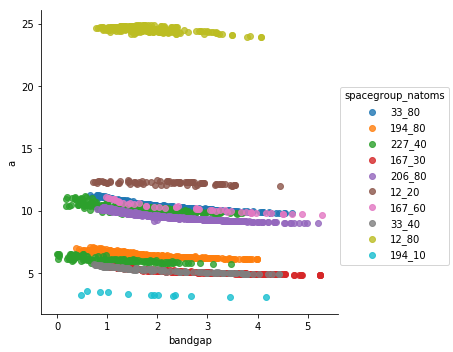

In [41]:
sns.lmplot(x='bandgap', y='a', data=train, hue='spacegroup_natoms', fit_reg=False);

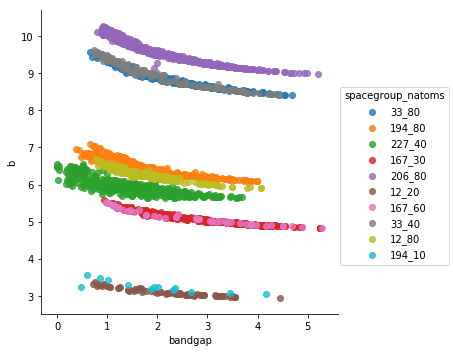

In [42]:
sns.lmplot(x='bandgap', y='b', data=train, hue='spacegroup_natoms', fit_reg=False);

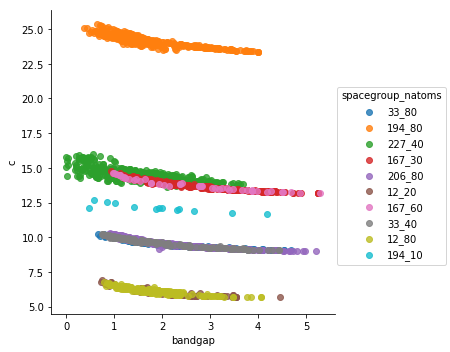

In [43]:
sns.lmplot(x='bandgap', y='c', data=train, hue='spacegroup_natoms', fit_reg=False);

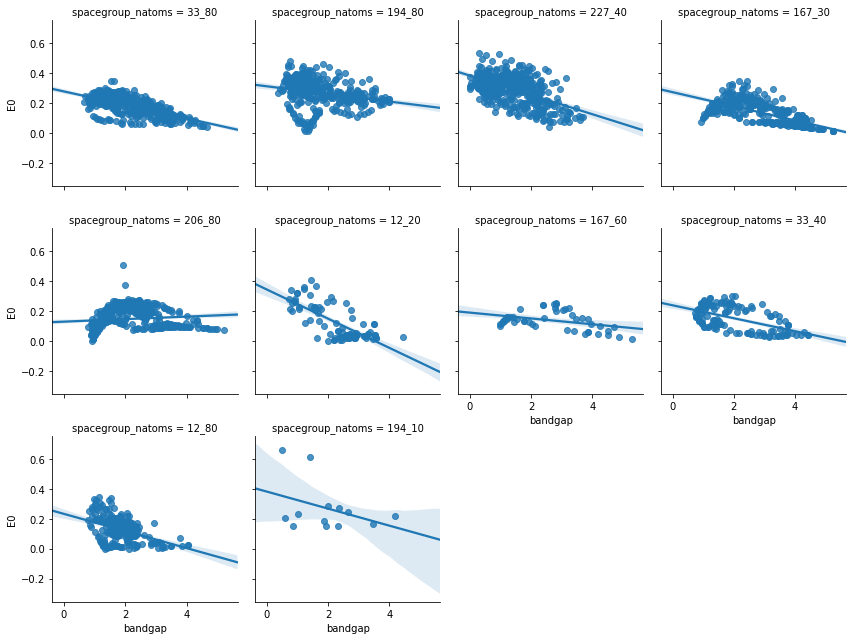

In [44]:
sns.lmplot(x='bandgap', y='E0', data=train, col='spacegroup_natoms', col_wrap=4, size=3);

In [46]:
train['cellvol'] = train.apply(lambda r: mg.Lattice.from_parameters(r['a'], r['b'], r['c'],
                                         r['alpha'], r['beta'], r['gamma']).volume,
                               axis=1)
test['cellvol'] = test.apply(lambda r: mg.Lattice.from_parameters(r['a'], r['b'], r['c'],
                                       r['alpha'], r['beta'], r['gamma']).volume,
                             axis=1)

In [47]:
train['atom_density'] = train['natoms'] / train['cellvol']
test['atom_density'] = test['natoms'] / test['cellvol']